In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Predict Price of Airline Tickets.csv") # reading dataset CSV file
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.isnull().sum()          #Checking Number of null rows

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Understanding the Dataset

In [4]:
Airline = df['Airline'].value_counts()
Airline = pd.DataFrame(Airline)
Airline

,Airline
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13
Jet Airways Business,6


In [5]:
df[df['Price']== df['Price'].max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [6]:
df[df['Price']==df['Price'].min()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM ? HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM ? HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM ? HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM ? HYD,05:45,07:05,1h 20m,non-stop,No info,1759


In [7]:
df['Price'].mean()

9087.064120565385

In [8]:
df[(df['Price'] > 9000) & (df['Price'] < 9100)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
298,Multiple carriers,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,07:30,19:15,11h 45m,1 stop,No info,9001
895,IndiGo,3/03/2019,Delhi,Cochin,DEL ? HYD ? COK,06:40,16:10,9h 30m,1 stop,No info,9027
1500,Multiple carriers,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,10:20,01:30 10 May,15h 10m,1 stop,No info,9021
1555,Multiple carriers,3/06/2019,Delhi,Cochin,DEL ? BOM ? COK,12:50,19:15,6h 25m,1 stop,No info,9001
3976,Multiple carriers,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:40,01:30 10 May,13h 50m,1 stop,No info,9021
4400,Multiple carriers,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,17:45,01:30 10 May,7h 45m,1 stop,No info,9021
4440,Multiple carriers,15/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:40,19:15,7h 35m,1 stop,No info,9001
5215,Multiple carriers,24/06/2019,Delhi,Cochin,DEL ? BOM ? COK,07:30,19:15,11h 45m,1 stop,No info,9001
5612,Multiple carriers,24/06/2019,Delhi,Cochin,DEL ? BOM ? COK,08:45,19:15,10h 30m,1 stop,No info,9001
6066,Multiple carriers,21/03/2019,Delhi,Cochin,DEL ? BOM ? COK,07:00,13:20,6h 20m,1 stop,No info,9042


In [9]:
df["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [10]:
df[df['Destination'] == 'Cochin']['Airline'].value_counts()

Jet Airways                          1586
Multiple carriers                    1196
Air India                             747
IndiGo                                705
SpiceJet                               87
Air Asia                               80
GoAir                                  76
Vistara                                45
Multiple carriers Premium economy      13
Jet Airways Business                    2
Name: Airline, dtype: int64

In [11]:
df[df['Destination']=='Delhi']['Airline'].value_counts()

Jet Airways                370
IndiGo                     366
SpiceJet                   137
Vistara                    131
Air India                  120
Air Asia                    71
GoAir                       69
Vistara Premium economy      1
Name: Airline, dtype: int64

# The association of Airline companies with Source

In [12]:
df["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [13]:
df[df['Source']=='Delhi']['Airline'].value_counts()

Jet Airways                          1586
Multiple carriers                    1196
Air India                             747
IndiGo                                705
SpiceJet                               87
Air Asia                               80
GoAir                                  76
Vistara                                45
Multiple carriers Premium economy      13
Jet Airways Business                    2
Name: Airline, dtype: int64

In [14]:
df[df['Source']=='Kolkata']['Airline'].value_counts()

Jet Airways    1256
Air India       512
IndiGo          445
SpiceJet        300
Vistara         183
Air Asia        150
GoAir            25
Name: Airline, dtype: int64

# Data Preparation

In [15]:
df=df.dropna()             #Only 1 or 2 rows, so we can drop the values

In [16]:
#Transforming datatype from Object to datetime type
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format= '%d/%m/%Y')
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [17]:
#Parsing Departing Time into two new colomns
df["Dep_Hour"] = df["Dep_Time"].dt.hour              #Departing Hour colomn   (.dt.hour) to parse hour from datetime data
df["Dep_Minutes"] = df["Dep_Time"].dt.minute         #Departing Minute colomn   (.dt.minute) to parse minutes from datetime data
df = df.drop(['Dep_Time'],axis=1)                 #Deleting Original  Dep_Time Colomn

In [18]:
#Parsing Departing Time into two new colomns
df["Arr_Hour"] = df["Arrival_Time"].dt.hour          #Arrival Hour colomn   (.dt.hour) to parse hour from datetime data
df["Arr_Minutes"] = df["Arrival_Time"].dt.minute     #Arrival Minute colomn   (.dt.minute) to parse minutes from datetime data
df = df.drop(['Arrival_Time'],axis=1)                 #Deleting Original Arrival_Time Colomn

In [19]:
#Parsing Journey Date to two new colomns representing Day and Month
df["Journey_Date"] = df["Date_of_Journey"].dt.day
df["Journey_Month"] = df["Date_of_Journey"].dt.month
df = df.drop(['Date_of_Journey'],axis=1)                 #Deleting Original Arrival_Time Colomn

In [20]:
df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.replace('h','').astype(int) 
df['Duration_Minutes'] = df['Duration'].str.split(' ').str[1].str.replace('m','').replace(np.nan,0).astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [21]:
#Couldnt parse data that doesn't have 'h', as this row states the flight takes 5 minute while having two stops
#Deleting row as inaccurate unreasonable data
df=df.drop(df[df['Duration'] == '5m'].index)

In [22]:
df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.replace('h','').astype(int) 
#Split data by looking for 'h', takes the string before (that represents the number of hours) and converts it to an integer

df['Duration_Minutes'] = df['Duration'].str.split(' ').str[1].str.replace('m','').replace(np.nan,0).astype(int)
#Split data by looking for 'm', takes that string (that represents the number of minutes) and converts it to an integer
#also replaces the null value for 0 minutes (if original string was for example: 19h)

pd.to_timedelta(df["Duration"])           #Converts Integer Data to a time format
df['Duration_In_Minutes'] =  df["Duration"] / pd.Timedelta(minutes=1) #Creating new colomn that has the duration in minutes
df = df.drop(['Duration'],axis=1)                 #Deleting Original Duration Colomn
df['Duration_In_Minutes']

0         170.0
1         445.0
2        1140.0
3         325.0
4         285.0
          ...  
10678     150.0
10679     155.0
10680     180.0
10681     160.0
10682     500.0
Name: Duration_In_Minutes, Length: 10681, dtype: float64

In [23]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [24]:
def stops_num(n):               #Creating a function that takes the value of Total_Stops rows
    if n == 'non-stop':     #If value states non-stop --> replaces it with int value of zero
        return 0          
    elif n == '1 stop':    #If value states 1 stops --> replaces it with int value of one
        return 1          
    elif n == "2 stops":   #If value states 2 stops --> replaces it with int value of two
        return 2          
    elif n == "3 stops":   #If value states 3 stops --> replaces it with int value of three
        return 3          
    elif n == "4 stops":  #If value states 4 stops --> replaces it with int value of four
        return 4          
    
df["Total_Stops"]=df["Total_Stops"].apply(stops_num) #Applies function to the colomn to replace the values

In [25]:
#To Include the effect each route in the trip has on the price, We'll establish One Hot Encoding to the Route
#Seperating Route values by splitting string after each '?' mark

df['R1'] = df['Route'].str.split('?').str[0]
df['R2'] = df['Route'].str.split('?').str[1]    
df['R3'] = df['Route'].str.split('?').str[2]    
df['R4'] = df['Route'].str.split('?').str[3]    
df['R5'] = df['Route'].str.split('?').str[4]    
df['R6'] = df['Route'].str.split('?').str[5]    

#As most of the data has only less than 3 stops
#Filling Null values 
for i in ['R3','R4','R5','R6']:  
    df[i].fillna('NoStop',inplace=True)
    
df = df.drop(['Route'],axis=1)           #Dropping Original Route Colomn

# Data Visualization

<AxesSubplot:xlabel='Airline', ylabel='Price'>

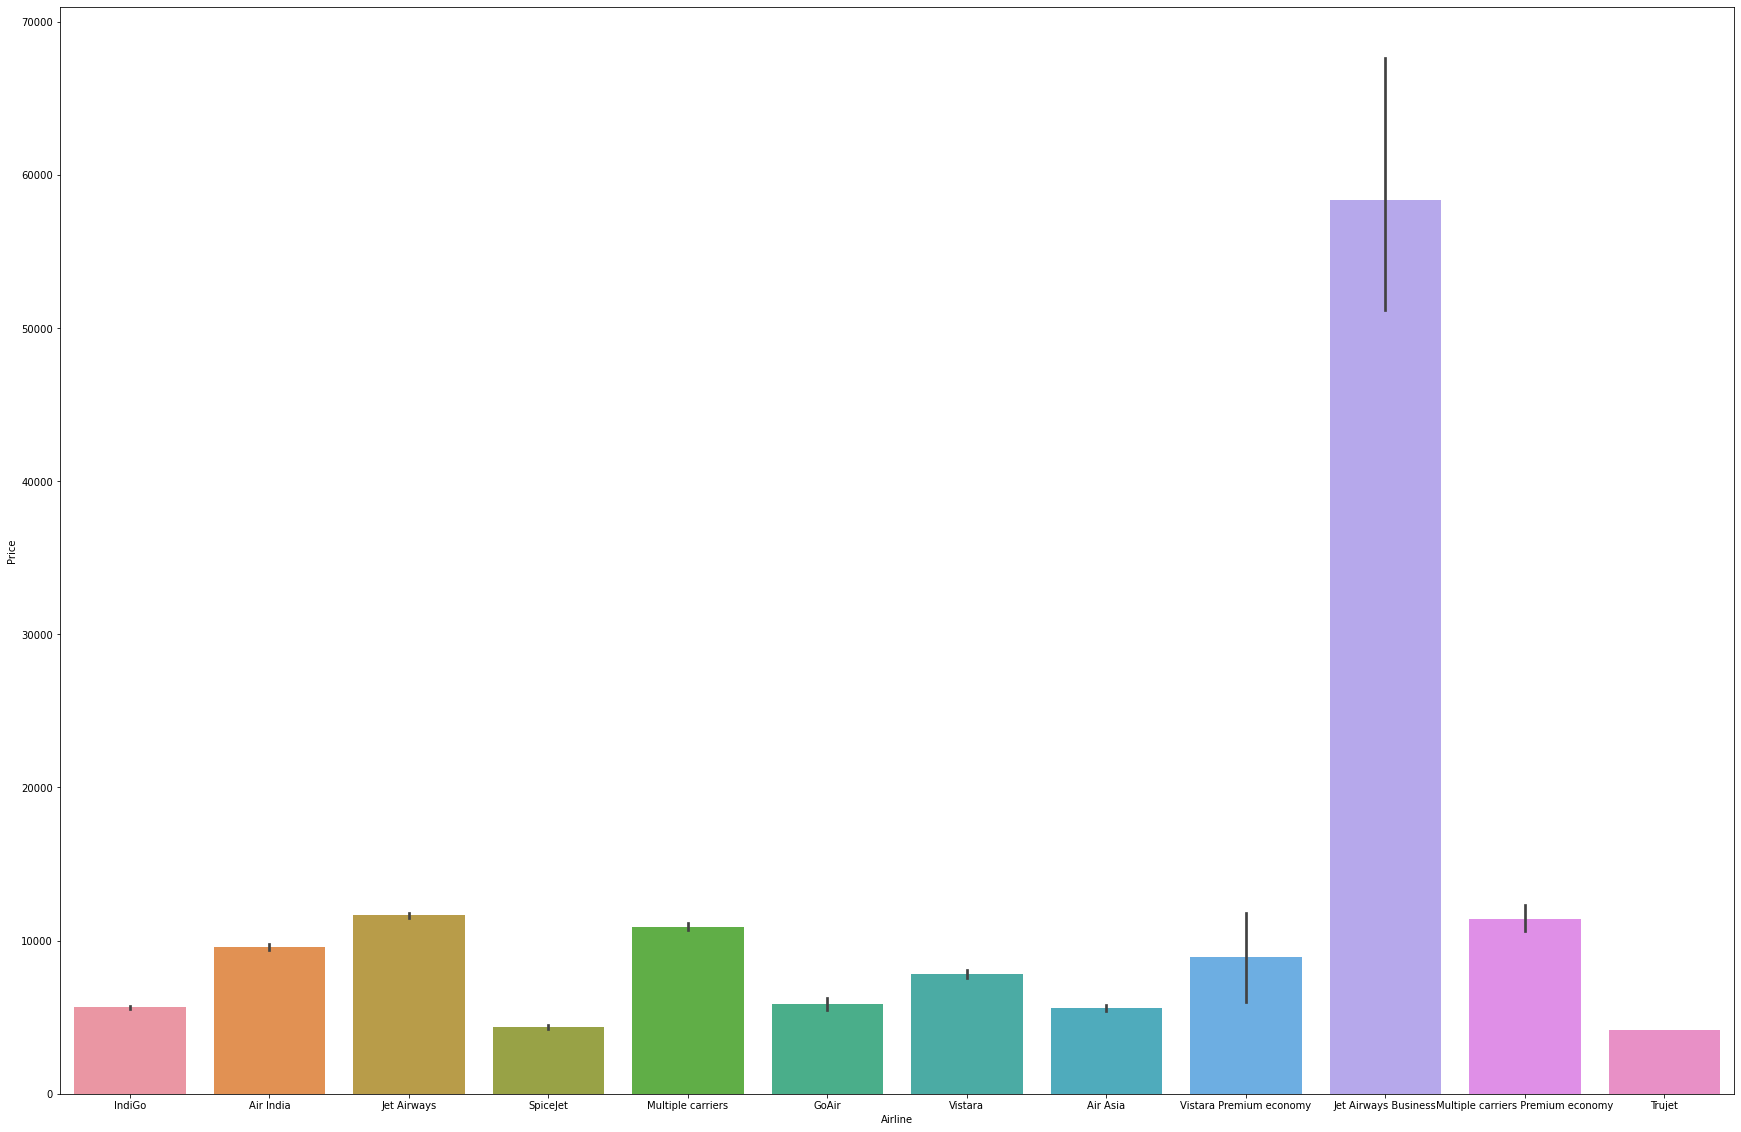

In [26]:
plt.figure(figsize=(30, 20))

sns.barplot(x='Airline',y='Price',data=df) # Relation Between Catigorical data 'Airline' in the X- Axis and Numerical data 'Prices' on Y-Axis

<AxesSubplot:xlabel='Price'>

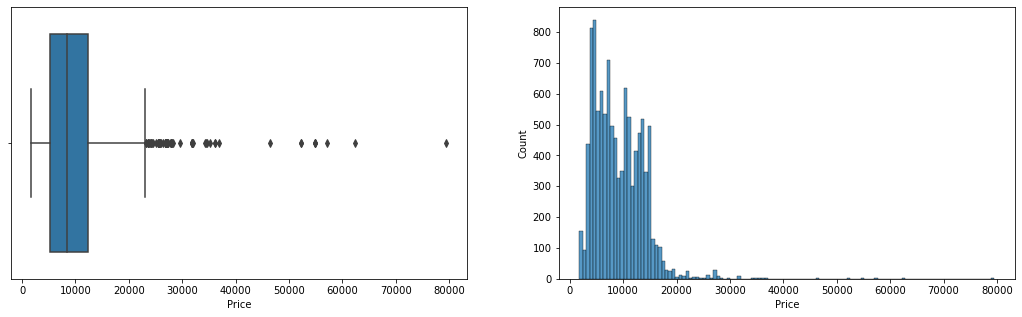

In [27]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,2)
sns.histplot(x = 'Price', data = df ) # Count The Most Prices Paid

plt.subplot(1,2,1)
sns.boxplot(x = 'Price', data = df)  
# Box plot of 'Price' to define the min, max, 25%, Median, 75% and Show The Outliers

<AxesSubplot:xlabel='Duration_In_Minutes'>

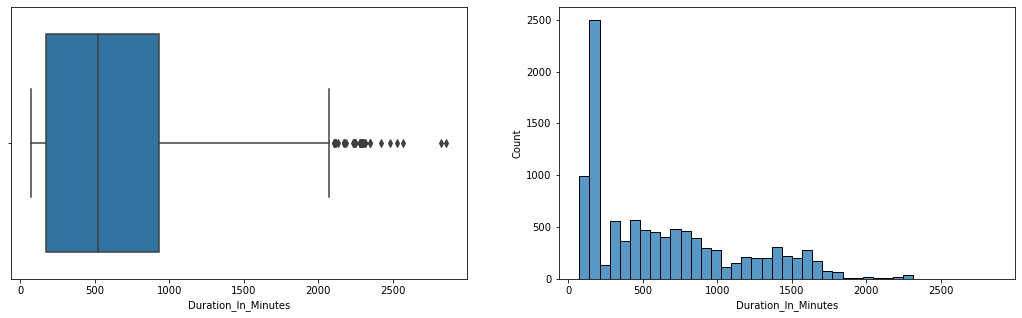

In [28]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,2)
sns.histplot(x = 'Duration_In_Minutes', data = df )  
# Count The Minutes of Taken For Journey

plt.subplot(1,2,1)
sns.boxplot(x = 'Duration_In_Minutes', data = df)   
# Box plot of 'Total_Min_Of_Journey' to define the min, max, 25%, Median, 75% and Show The Outliers


<AxesSubplot:xlabel='Total_Stops'>

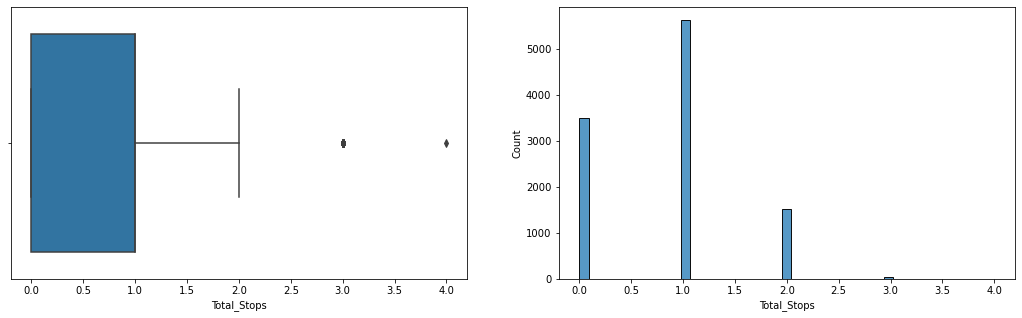

In [29]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,2)
sns.histplot(x = 'Total_Stops', data = df )   # Count The Total Stops And Count Them 

plt.subplot(1,2,1)
sns.boxplot(x = 'Total_Stops', data = df)   # Box plot of 'Total_Stops' to define the min, max, 25%, Median, 75% and Show The Outliers

Text(0.5, 1.0, 'Number of Taken Path')

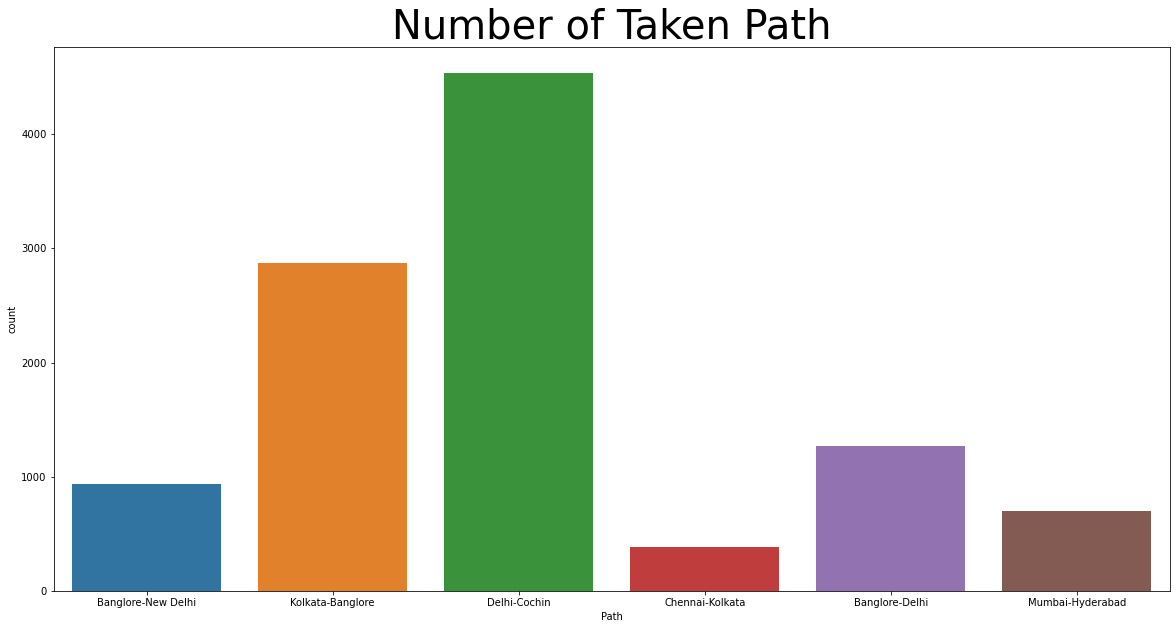

In [30]:
df["Path"]= df["Source"]+"-"+df["Destination"]  # Define A New Column with the name "Path" Which is The Concat of The Column Source and Destination 
 
plt.figure(figsize=(20, 10))                    # Resize The Figure 
 
sns.countplot(x="Path",data=df).set_title('Number of Taken Path',fontsize=40)   # Count The Number Of Taken Paths

Text(0.5, 1.0, 'Airline prices based on the Path')

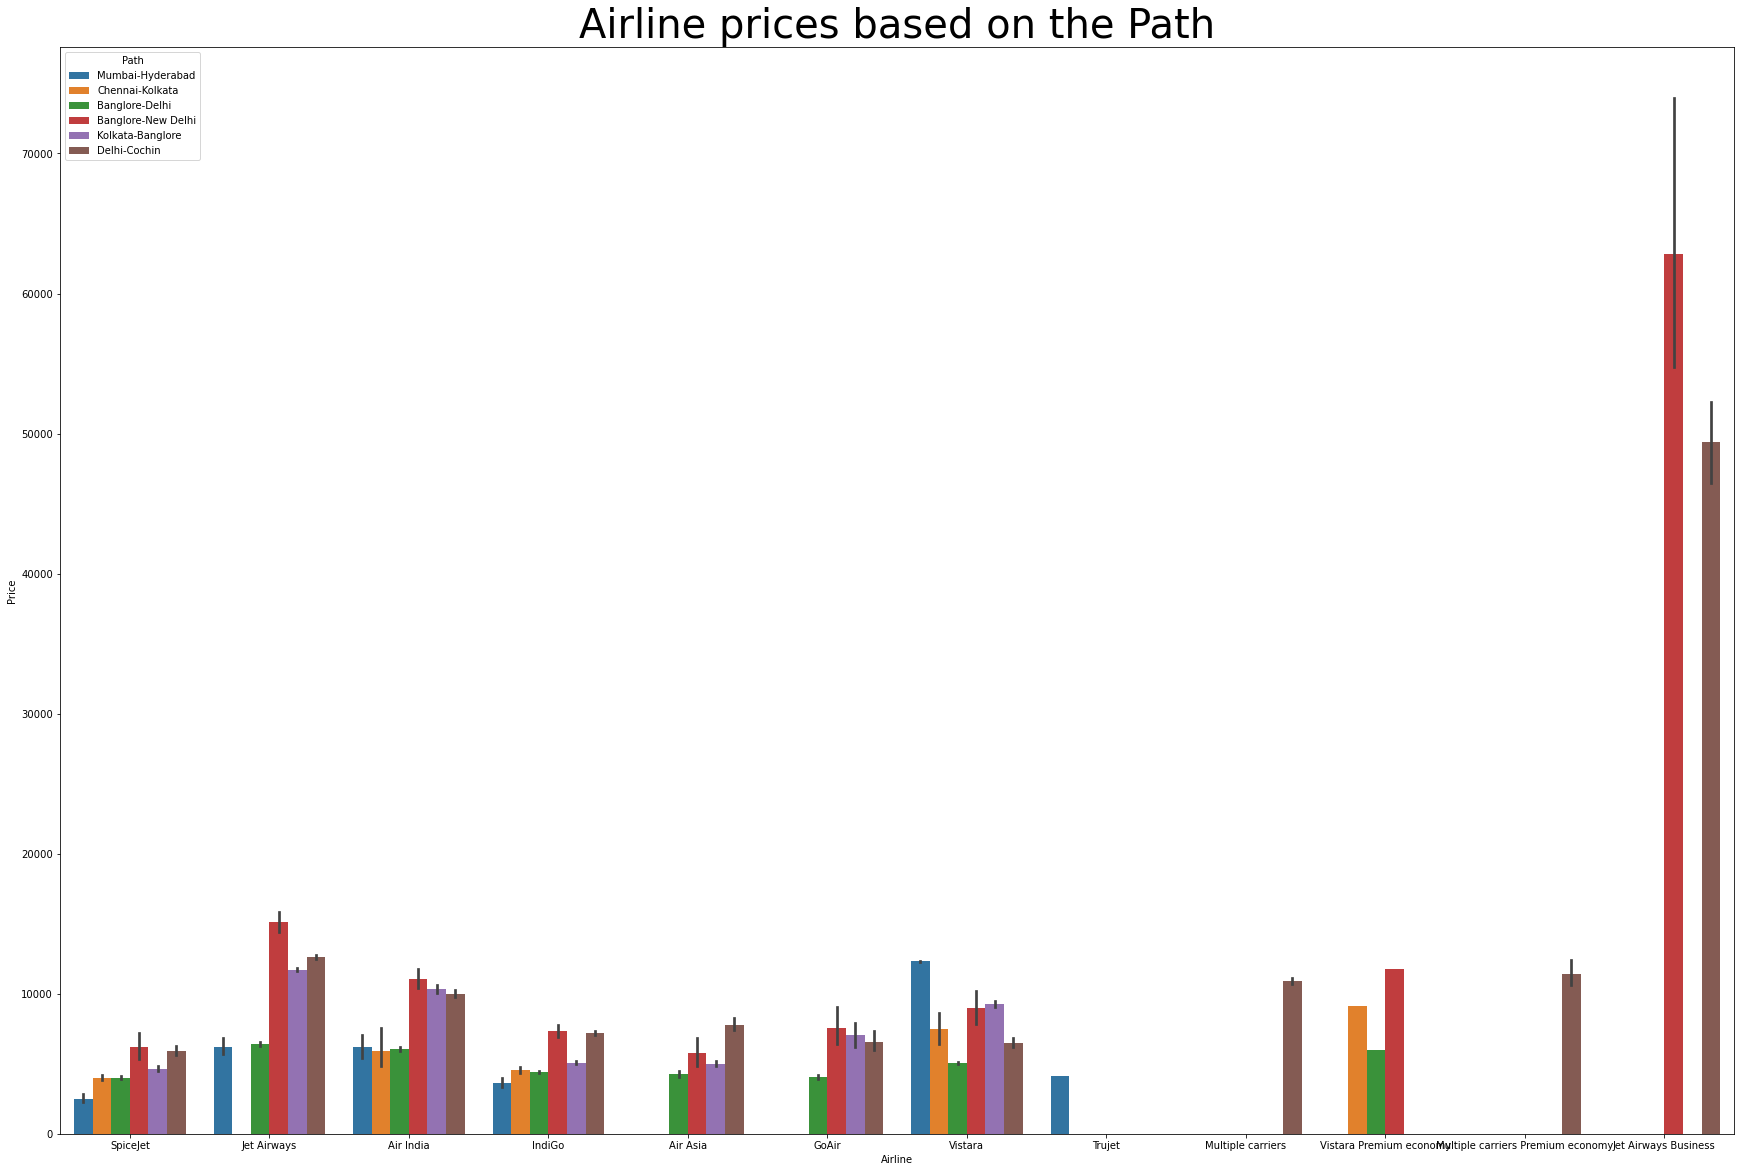

In [31]:
plt.figure(figsize=(30, 20))
# Using The Seaborn Library to plot a realtion Between Catigorical Data 'Airline' and Numerical data 'Price' Based On Catigorical data 'Path'
sns.barplot(x='Airline',y='Price',hue="Path",data=df.sort_values("Price")).set_title('Airline prices based on the Path',fontsize=40)

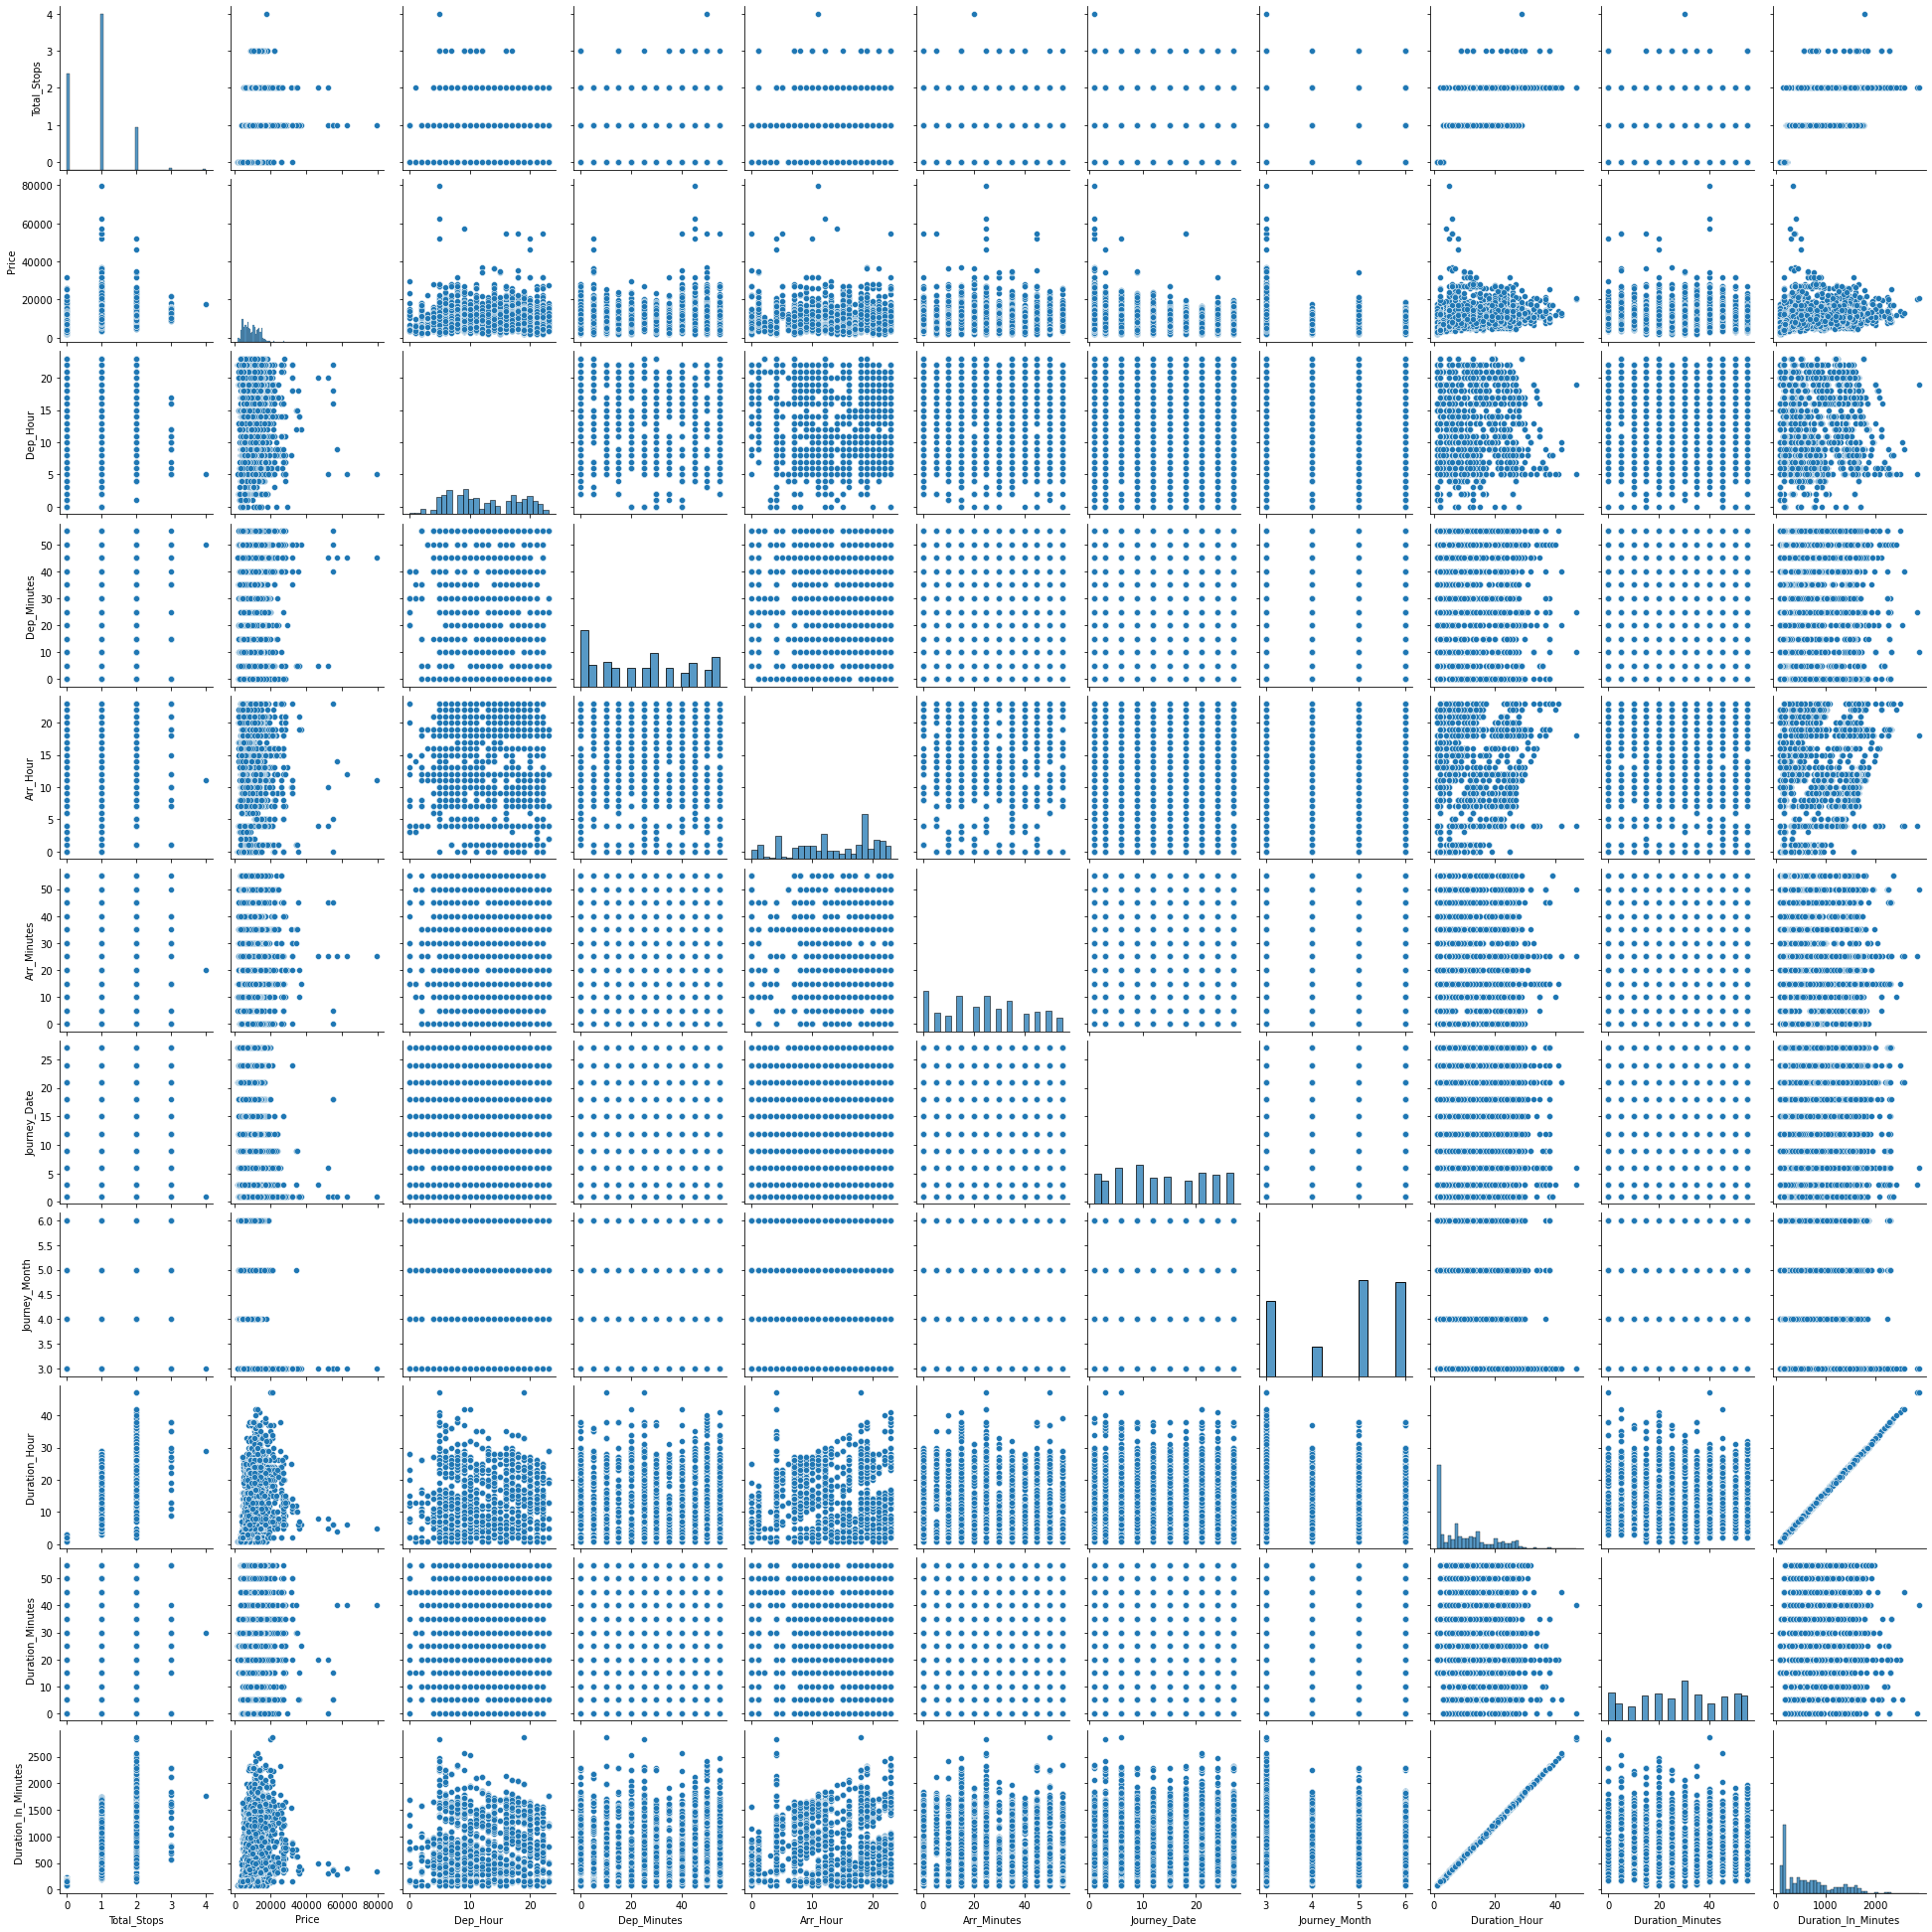

In [32]:
sns.pairplot(df)

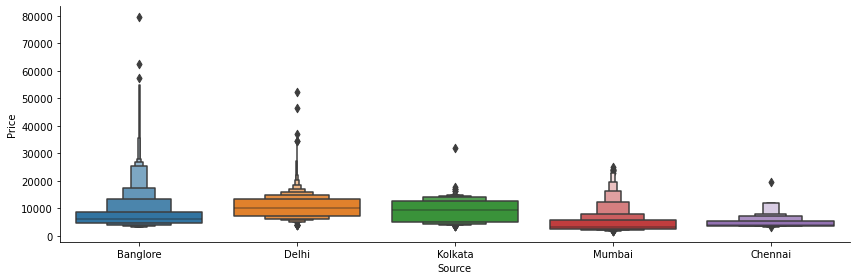

In [33]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

<AxesSubplot:>

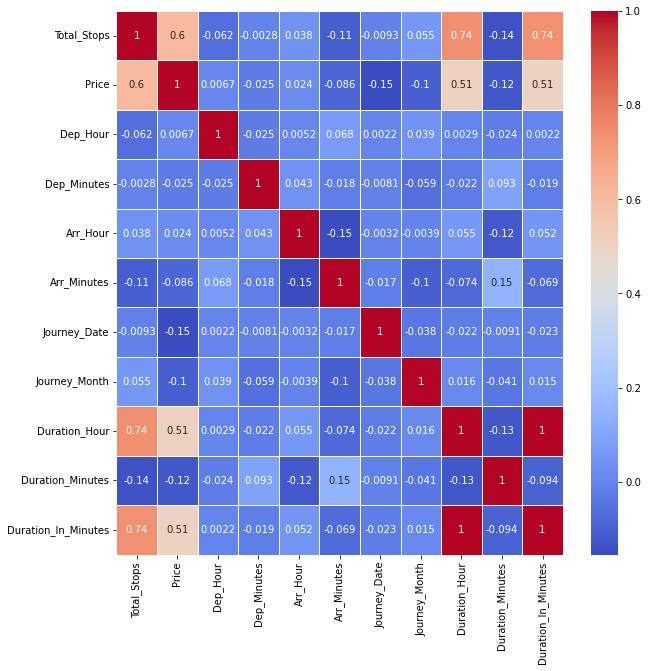

In [34]:
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(df.corr(),cmap="coolwarm",linewidths=.5,annot=True) 
# Heatmap To The Coolration Between Columns Descibe The Relation Between Each Column 

<Figure size 1440x720 with 0 Axes>

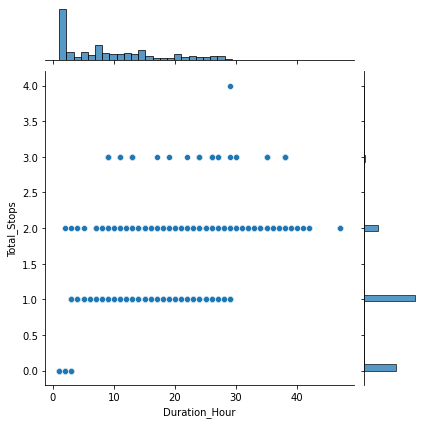

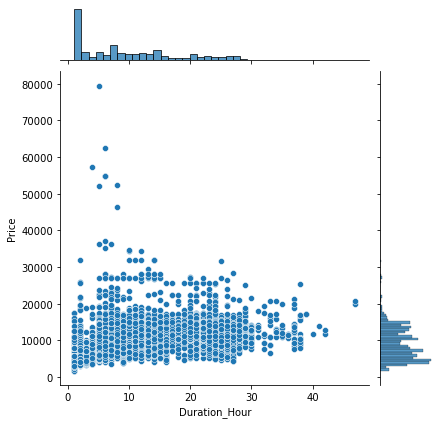

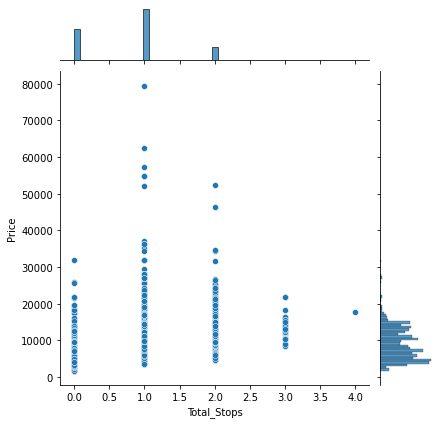

In [35]:
plt.figure(figsize=(20, 10))
sns.jointplot(x='Duration_Hour',y='Total_Stops',data=df,kind='scatter') # Relation Between 'duration_hour' on x-axis and 'Total_Stops' on y-axis
sns.jointplot(x='Duration_Hour',y='Price',data=df,kind='scatter')  # Relation Between 'duration_hour' on x-axis and 'Price' on y-axis
sns.jointplot(x='Total_Stops',y='Price',data=df,kind='scatter') # Relation Between 'Total_Stops' on x-axis and 'Price' on y-axis

# Apply Linear Regression Algorithm

In [36]:
#One Hot Encoding the string colomns
df = pd.get_dummies(df, columns=['Airline','Source', 'Destination','Additional_Info','R1','R2','R3','R4','R5','R6','Path'])


In [37]:
X = df.drop(columns=['Price'])   #Setting X to all colomns except Colomn that we need to predict ('Price')
y = df['Price']                  #Setting y to colomn that we need to predict 

In [38]:
#Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [39]:
#Training Model using Linear Regression
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
#Predicting the X_Test set
y_pred = regressor.predict(X_test)  

In [41]:
from sklearn import metrics 

print("MSE:",metrics.mean_squared_error(y_pred,y_test))                      #Mean Squared Error Value
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))                     #Mean Absolute Error Value
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))            
print("r2_score:",metrics.r2_score(y_test,y_pred))                           #R2 Accuracy Score

MSE: 6000007.300800357
MAE: 1585.7137105315178
RMSE: 2449.491233052357
r2_score: 0.7126389136979916
